# t-SNE Visualization

In this visualization, I try to see if the data creates natural clusterings / groupings. However, due to the high dimension of the data, I require a dimensionality reduction method to visualize the data. In this case, I use t-SNE.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

TRAINSET = '../data/raw/0173eeb640e7-Challenge+Data+Set+-+Campus+Analytics+2020.xlsx'

In [2]:
# Load in data and visually inspect/verify
df = pd.read_excel(TRAINSET)
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X22,X23,X24,X25,X26,X27,X28,X29,XC,y
0,0.985703,0.899527,2.332283,1.044273,1.141718,-1.656647,-1.409265,1.043518,-0.931461,-1.726754,...,0.628801,0.511403,0.562767,-0.356514,0.867604,-0.218642,-0.336591,0.096781,C,0
1,0.539816,0.243602,1.636048,-0.562150,-0.235560,-1.316039,1.529069,-1.415871,-1.167266,-0.103195,...,0.734907,0.929244,-0.805046,0.268788,1.025799,1.112271,1.492585,-0.497020,E,0
2,-1.424483,-0.470533,0.095100,0.131981,1.168902,-0.827530,-1.233111,0.556679,-1.384065,-1.197944,...,-1.398526,-2.139636,-1.238090,-0.139802,-2.317249,0.113483,0.521594,1.269208,E,0
3,-1.034157,-1.054496,0.339467,-0.829151,0.012123,0.048887,0.573195,-0.189184,-0.674289,0.975835,...,0.305298,-0.368107,-0.664859,0.225715,-0.865773,-0.026332,-0.209023,0.074814,E,0
4,0.177091,1.154216,1.004133,-0.724015,-0.508090,-0.478284,-0.524431,1.841560,-1.147140,0.435025,...,1.095991,-0.993104,-0.775456,0.938553,0.662388,0.483111,-0.910481,1.544431,E,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.127214,-0.644439,-0.356251,-1.188522,0.646979,-1.018895,-0.153524,-0.102938,1.109257,0.173160,...,-1.362069,-2.267345,0.329806,0.255234,-1.145799,0.673261,-0.072575,0.233888,A,1
2996,0.427700,1.460896,-1.260326,2.206359,-0.981929,0.045186,0.406928,-0.409999,0.602068,-1.145479,...,0.558446,-1.430444,0.067506,-0.865400,0.571944,1.172911,-0.917354,0.126003,C,0
2997,-0.880540,0.678472,0.493897,-0.118869,0.005285,-0.201233,-0.601732,-0.747260,-0.413440,-1.144848,...,0.924523,-0.304820,0.153800,0.316073,0.243841,-1.641217,0.287025,0.591607,B,1
2998,0.151291,-0.949928,-1.960683,-1.352557,2.221015,-0.775556,0.932388,-0.963642,0.649496,-1.658190,...,0.896517,-0.586427,-0.314806,-0.048052,0.142921,1.057203,-1.335579,-0.108947,B,0


In [3]:
vecs, chars, targets = [], [], []

# Extract all data
targets = df['y'].to_numpy()
chars = df['XC'].to_numpy()
feat_df = df.drop(['y', 'XC'], axis=1)
vecs = feat_df.to_numpy()

In [4]:
# Represent feature vectors in lower dimensional space
vecs_embedded = TSNE(n_components=2).fit_transform(vecs)

In [5]:
# Organize data for plotting
data = {
    0: {
        'A': [],
        'B': [],
        'C': [],
        'D': [],
        'E': [],
    },
    1: {
        'A': [],
        'B': [],
        'C': [],
        'D': [],
        'E': [],
    }
}

for vec_embed, char, target in zip(vecs_embedded, chars, targets):
    data[target][char].append(vec_embed)

# Plot by target label

In [6]:
def plot_point(vec, char, target, include_target=True, include_char=True):
    if include_target:
        if target == 0:
            color = '#3498cd'
        else:
            color = '#f89939'
    else:
        color = 'b'
        
    marker = f'${char}$' if include_char else '.'
    
    plt.scatter(vec[0], vec[1], c=color, marker=marker)

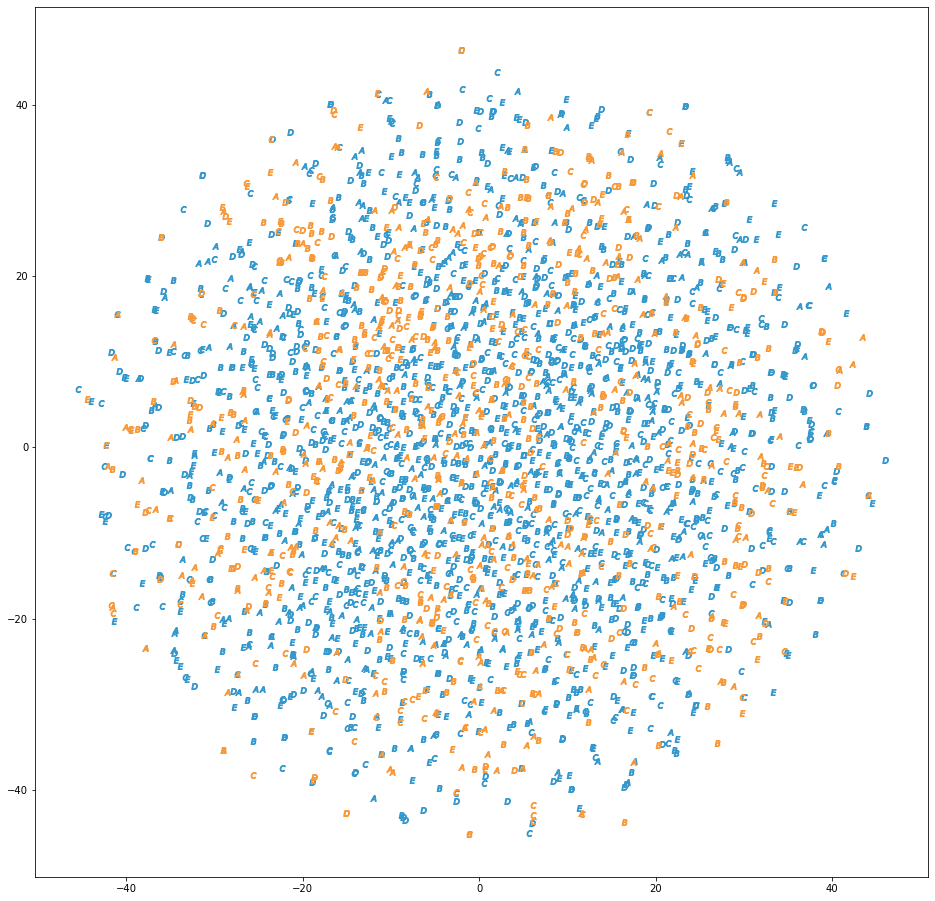

In [7]:
# Visualize by target label
plt.figure(figsize=(16,16))
for target, char_dict in data.items():
    for char, data_pts_ls in char_dict.items():
        for data_pt in data_pts_ls:
            plot_point(data_pt, char, target)
plt.show()

After observing this graph, the data appears to be quite random. To consider the groupings by target label (0 or 1), I focus on the color of the datapoint and ignore the char value.

Groupings cannot be distinguished and the spread is wide but points are denser in the center in a form of Gaussian spread. Note: I do not assume that the data takes on a Gaussian distribution. I am simply making an observation of the appearance of the visualization.

# Plot by Char Feature (Column 'XC' in the data)
Although the classification task does not use the char feature column 'XC' as a class, I attempt to see if the char feature 'XC' is strongly correlated with the numerical features. If so, then this feature will also be correlated with the final binary classification label.

In [8]:
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
def plot_by_char(vec, char, target):
    plt.scatter(vec[0], vec[1], c=COLORS[ord(char) - ord('A')], marker=f'${char}$')

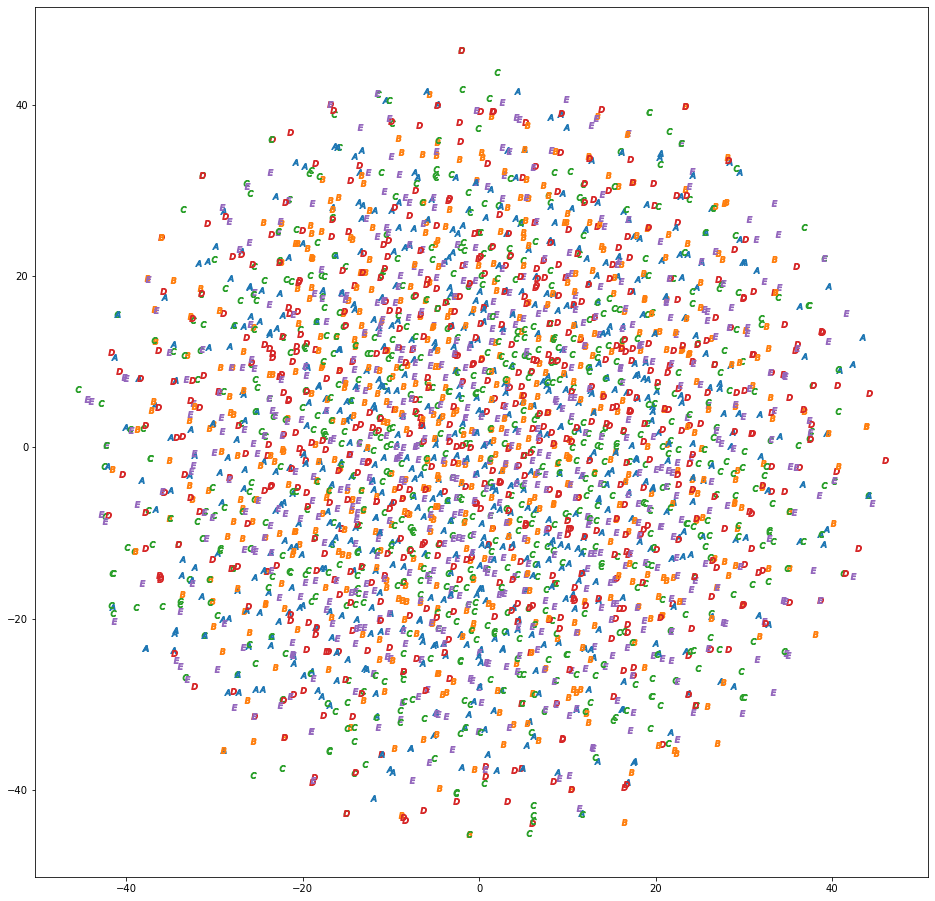

In [9]:
# Visualize by char feature
plt.figure(figsize=(16,16))
for target, char_dict in data.items():
    for char, data_pts_ls in char_dict.items():
        for data_pt in data_pts_ls:
            plot_by_char(data_pt, char, target)
plt.show()

In this demonstration, I try to see if there are perceptable grouping by the character feature (column 'XC'). However, results are similar to the earlier demonstration by target label: randomness in the form of Gaussian spread. Note: I do not assume that the data takes on a Gaussian distribution. I am simply making an observation of the appearance of the visualization.

For both demonstrations however, it should be noted that t-SNE uses a t-distribution to compare similarity of points. Therefore, the visualization would naturally appear to have denser centers.

However, due to the overlapping of all these data points, I can conclude that this visualization does not allow me to find obvious relationships between data points if one exists.